# Interactive image visualization with napari
[napari](https://napari.org/) is a python-based image viewer. Today, we will use it by remote-controlling it from a jupyter notebook.

See also
* [napari tutorials](https://napari.org/tutorials/index.html)
* [Multi-dimensional image visualization in Python using napari [NEUBIAS Academy@Home] webinar](https://www.youtube.com/watch?v=VgvDSq5aCDQ)

For opening an image, we still use scikit-image:

In [1]:
from skimage.io import imread

image = imread('../../data/blobs.tif')

# print out the spatial dimensions of the image
print(image.shape)

(254, 256)


In [2]:
import napari

# Create an empty viewer
viewer = napari.Viewer()

In [3]:
# Add a new layer containing an image
viewer.add_image(image);

With this command, we can make a screenshot of napari and save it in our notebook.

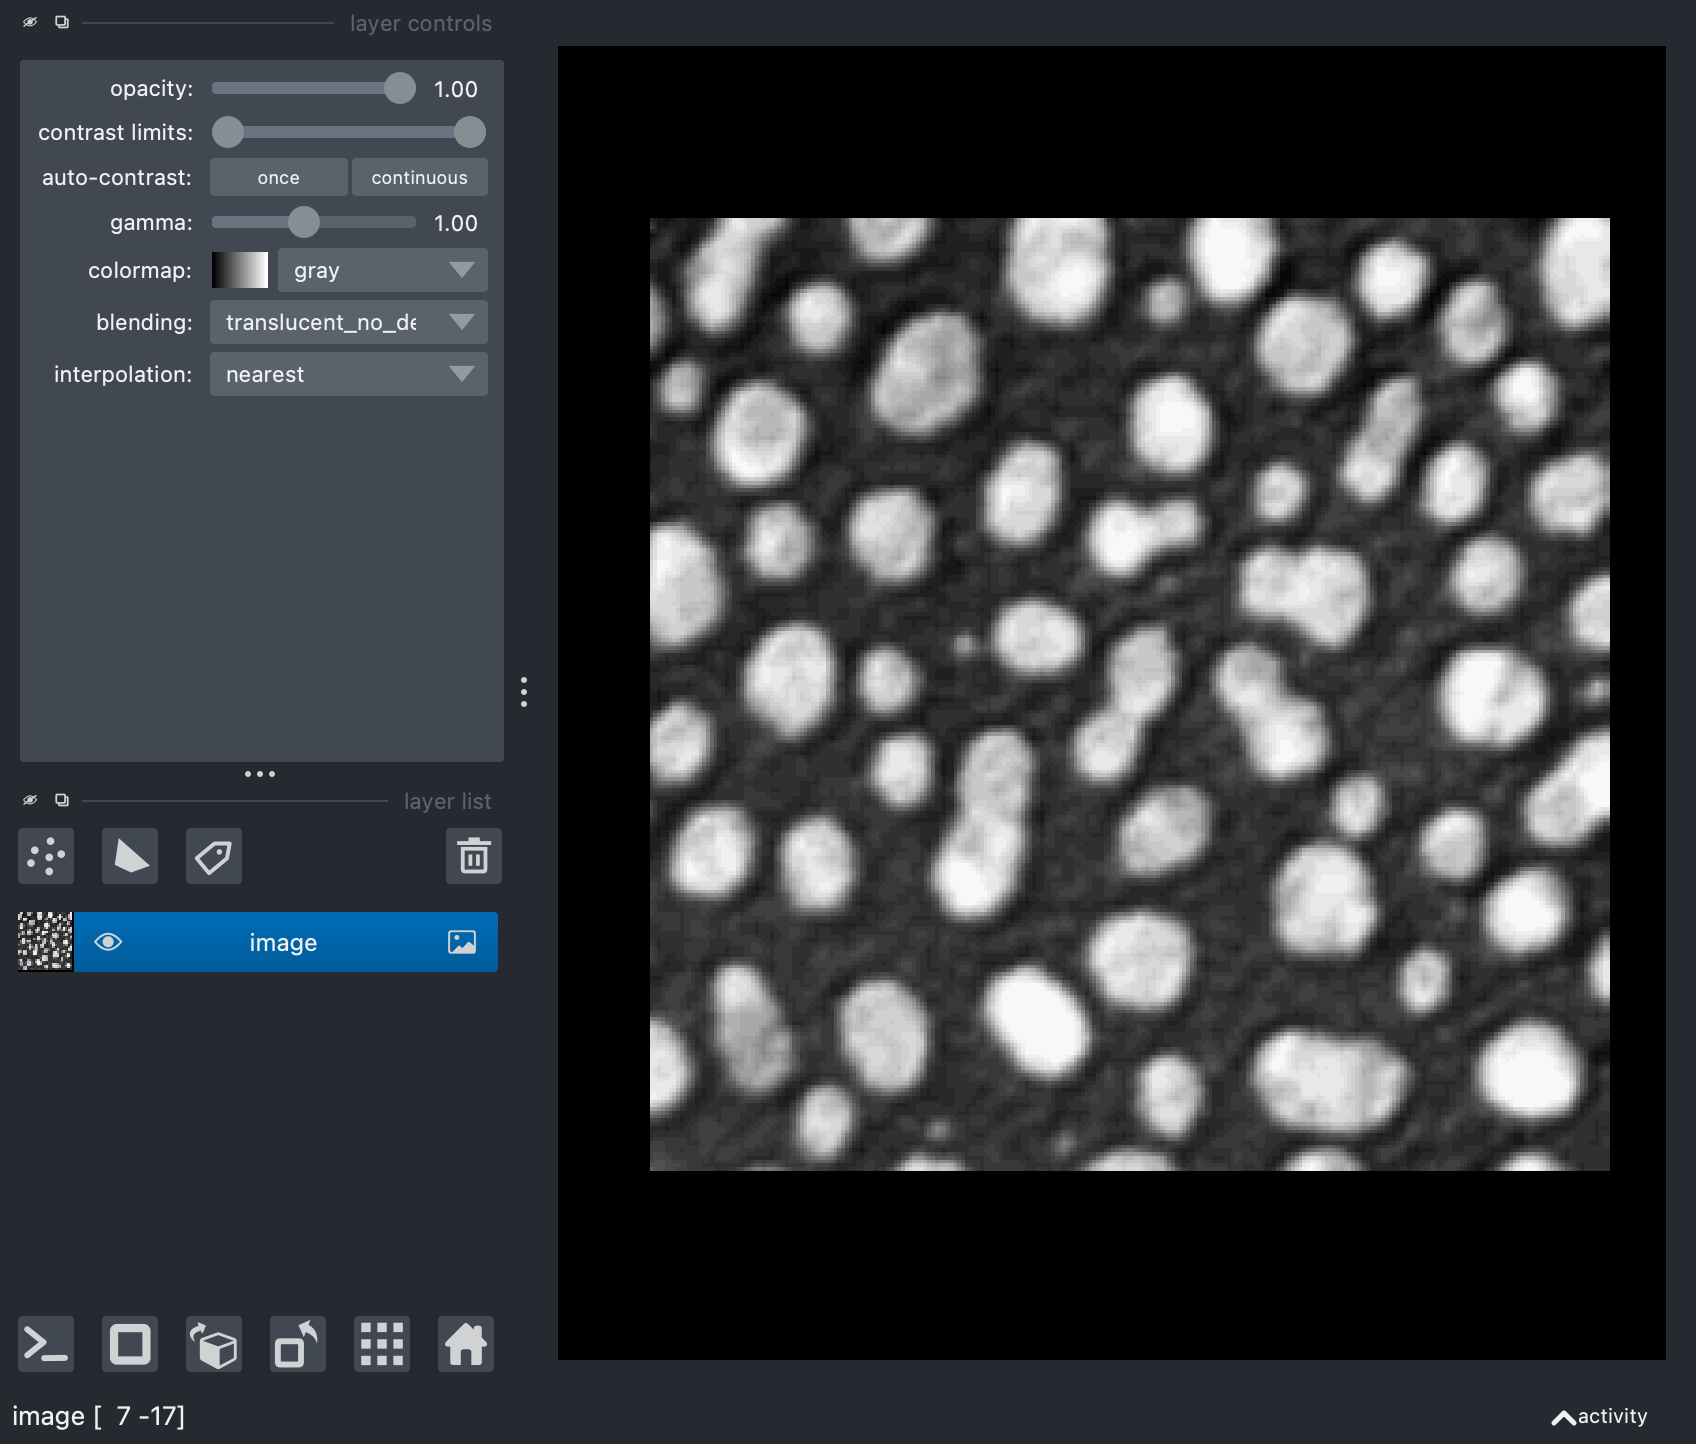

In [4]:
napari.utils.nbscreenshot(viewer)

In [5]:
# Remove all layers to start from scratch
for l in viewer.layers:
    viewer.layers.remove(l)

In [7]:
# add the image again with a different lookup table
viewer.add_image(image, colormap='green');

We now blur the image and put it in the viewer

In [8]:
from skimage.filters import gaussian
blurred_image = gaussian(image, sigma=5)

# Add to napari
viewer.add_image(blurred_image);

We now apply background subtraction to the image and add it to the viewer

In [9]:
from skimage.morphology import white_tophat, disk
background_subtracted_image = white_tophat(image, disk(25))

# Add a new layer containing an image
viewer.add_image(background_subtracted_image);

By clicking the galery button (bottom left), we can view the different images side by side:

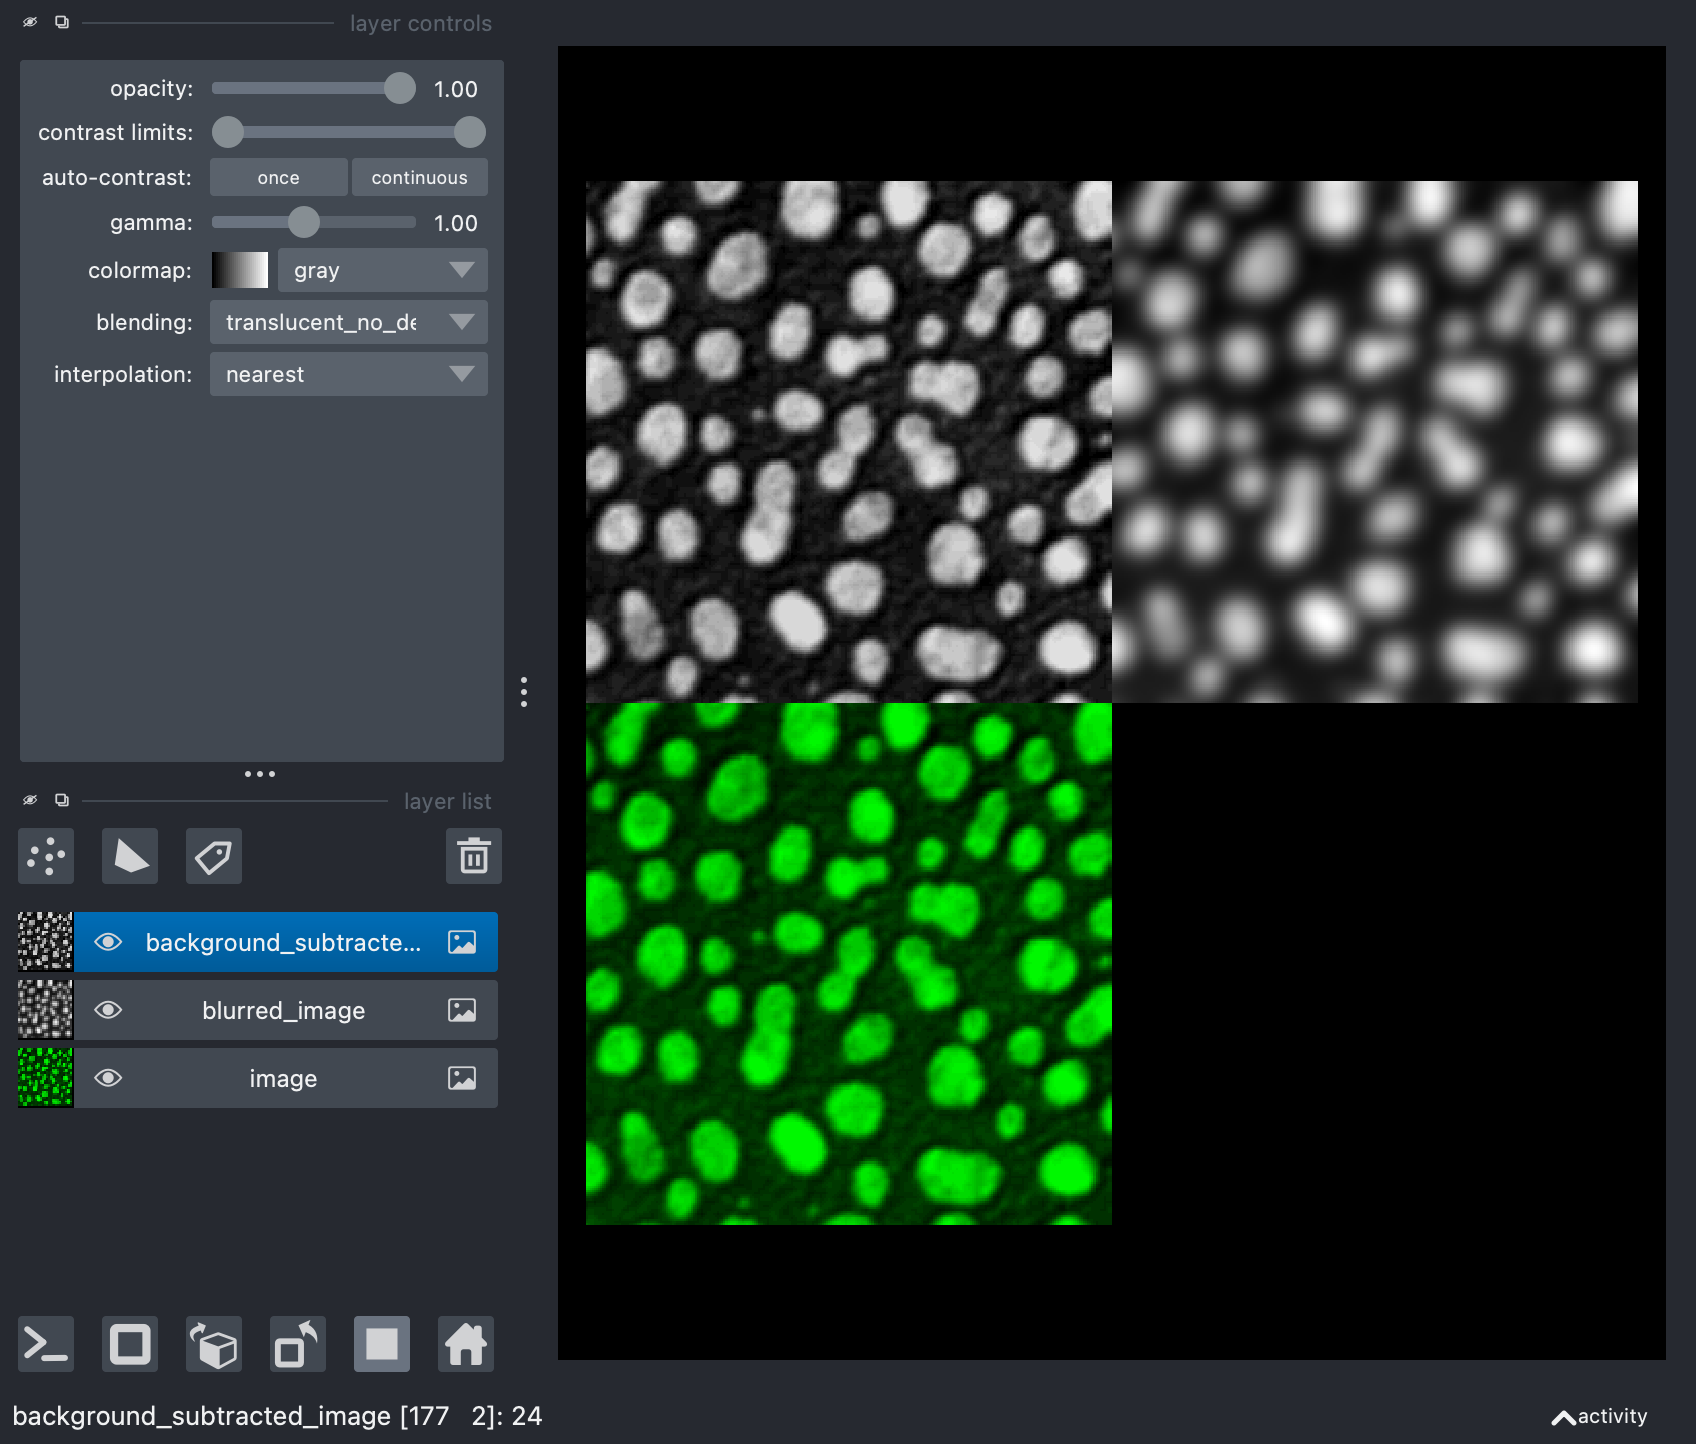

In [10]:
napari.utils.nbscreenshot(viewer)

## Exercise
Start a new notebook, import napari, load the image `../data/hela-cells.tif` and add its three channels independently to napari as three layers. Afterwards, play with colormap and blending in the user interface. Can you make it look similar to ImageJ? Also check out the napari [image layer tutorial](https://napari.org/tutorials/fundamentals/image.html). Can you also code this?